In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Google_Stock_Price.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
X = df.loc[:,["Open"]].values

In [8]:
X.shape

(1258, 1)

In [9]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

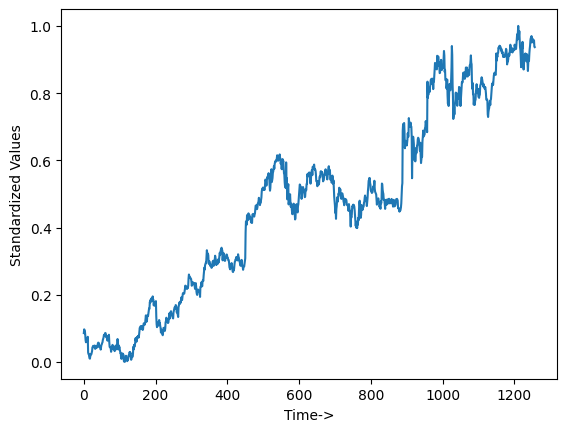

In [12]:
import matplotlib.pyplot as plt
plt.plot(scaled_data, label='Google Stock Price')
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

In [13]:
x_train = []
y_train = []
time = 60
for i in range(60,scaled_data.shape[0]):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [14]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')


In [21]:

model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20

34/34 [==============================] - 7s 48ms/step - loss: 0.1212 - val_loss: 0.0036
Epoch 2/20
34/34 [==============================] - 1s 24ms/step - loss: 0.0337 - val_loss: 8.6766e-04
Epoch 3/20
34/34 [==============================] - 1s 24ms/step - loss: 0.0163 - val_loss: 5.3569e-04
Epoch 4/20
34/34 [==============================] - 1s 25ms/step - loss: 0.0126 - val_loss: 0.0016
Epoch 5/20
34/34 [==============================] - 1s 24ms/step - loss: 0.0097 - val_loss: 4.5385e-04
Epoch 6/20
34/34 [==============================] - 1s 24ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 7/20
34/34 [==============================] - 1s 24ms/step - loss: 0.0068 - val_loss: 8.7236e-04
Epoch 8/20
34/34 [==============================] - 1s 23ms/step - loss: 0.0069 - val_loss: 0.0015
Epoch 9/20
34/34 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 10/20
34/34 [==============================] - 1s 23ms/step - loss: 0.0044 - val_loss:

In [22]:
output = model.evaluate(x=x_train,y=y_train)

38/38 [==============================] - 0s 8ms/step - loss: 6.7309e-04


In [26]:
print(f"Loss: {output}")

Loss: 0.000673092610668391


In [23]:
y_pred = model.predict(x_train)

38/38 [==============================] - 1s 8ms/step


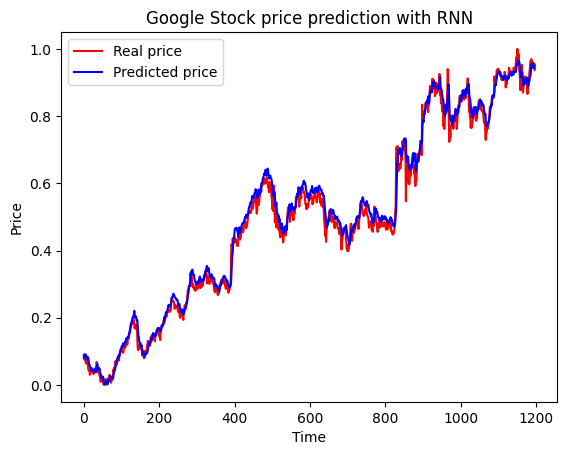

In [25]:
plt.plot(y_train, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Google Stock price prediction with RNN')
plt.show()